In [56]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [57]:
nhanes = pd.read_csv('nhanes_data.csv')
nhanes.head()

,ID,Albumin,Alkaline_Phosphatase,Blood_Urea_Nitrogen,Creatinine,C_Reactive_Protein,Glucose,Glycohemoglobin,Total_Cholesterol,Uric_Acid,White_Blood_Cell_Count,Lymphocyte_Percent,Mean_Cell_Volume,Red_Cell_Distribution_Width,Systolic_Blood_Pressure,Health_Status,Age,Gender
0,93705.0,4.4,74,11,0.92,2.72,85,6.2,157,5.8,8.6,40.0,67.0,15.6,200.000000,3,66,Female
1,93706.0,4.4,79,12,0.81,0.74,94,5.2,149,8.0,6.1,24.6,89.7,12.2,111.333333,2,18,Male
2,93707.0,5.2,238,17,0.64,0.32,115,5.6,199,5.5,11.2,37.1,83.9,13.6,128.000000,3,13,Male
3,93708.0,3.9,66,16,0.58,1.83,116,6.2,210,4.5,6.0,31.3,86.8,13.4,142.000000,3,66,Female
4,93711.0,4.0,56,14,1.13,0.82,98,5.7,239,4.2,5.0,35.5,92.9,13.3,101.333333,2,56,Male


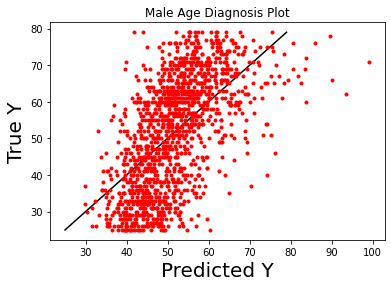

Male Age MSE:
148.4964577818699


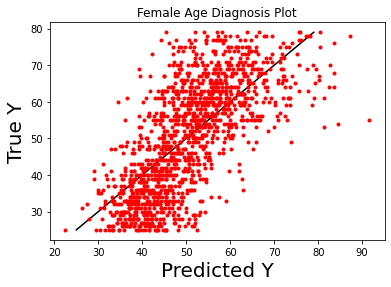

Female Age MSE:
113.4125168693336


LinearRegression()

In [59]:
def run_age_regression(df, regression_name):
    X = df[['Albumin', 'Alkaline_Phosphatase', 'Blood_Urea_Nitrogen', 'Creatinine', 'C_Reactive_Protein', 'Glucose', 'Glycohemoglobin', 'Total_Cholesterol', 'Uric_Acid', 'White_Blood_Cell_Count', 'Lymphocyte_Percent', 'Mean_Cell_Volume', 'Red_Cell_Distribution_Width', 'Systolic_Blood_Pressure']]
    y = df['Age']
    
    # Normalize values of X
    X = MinMaxScaler().fit_transform(X)
    
    reg = LinearRegression()
    reg.fit(X, y)
    
    y_pred = reg.predict(X)
    
    # Diagnosis plot
    plt.plot([25, max(y)], [25, max(y)], 'k')
    plt.plot(reg.predict(X), y, '.r')
    plt.xlabel('Predicted Y', size = 20)
    plt.ylabel('True Y', size = 20)
    plt.title(regression_name + ' Diagnosis Plot')
    plt.show()
    
    # Calculate mean squared error
    mse = np.mean((y - y_pred)**2)
    print(regression_name + ' MSE:')
    print(mse)
    
    return reg

# Exclude below 25
nhanes = nhanes[nhanes['Age'] >= 25]

# Gender is a factor: 1 = Male, 2 = Female
nhanes_male = nhanes[nhanes['Gender'] == 'Male']
nhanes_female = nhanes[nhanes['Gender'] == 'Female']

run_age_regression(nhanes_male, 'Male Age')

run_age_regression(nhanes_female, 'Female Age')